In [75]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import  statsmodels.formula.api as sm
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [76]:
credit_loan = pd.read_csv('https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning/main/Datasets/Credit_Risk_CV.csv')

In [77]:
credit_loan.head()

,Sr_No,SeriousDlqin2yrs,util_new,age_new,num_30_59_dpd_new,DebtRatio_new_ind,DebtRatio_new,MonthlyIncome_ind,MonthlyIncome_new,Open_Credit_lines_new,num_90_dpd_new,Real_estate_loans_new,num_60_dpd_new,NumberOfDependents_new
0,3,0,0.658180,38,1,0,0.085113,1,3042,2,1,0,0,0
1,4,0,0.233810,30,0,0,0.036050,1,3300,5,0,0,0,0
2,5,0,0.907239,49,1,0,0.024926,1,5400,7,0,1,0,0
3,7,0,0.305682,57,0,1,0.366508,0,5400,8,0,3,0,0
4,8,0,0.754464,39,0,0,0.209940,1,3500,8,0,0,0,0


In [78]:
def ols_formula(df,dependent_var):
  col = list(df.columns)
  col.remove(dependent_var)
  independent_vars = col
  formula = dependent_var+'~'+'+'.join(independent_vars)
  return formula


In [79]:
model_formula = ols_formula(credit_loan.iloc[:,1:],"SeriousDlqin2yrs")
print(model_formula)
model = sm.logit(model_formula,data=credit_loan)
result = model.fit()
print(result.summary())

SeriousDlqin2yrs~util_new+age_new+num_30_59_dpd_new+DebtRatio_new_ind+DebtRatio_new+MonthlyIncome_ind+MonthlyIncome_new+Open_Credit_lines_new+num_90_dpd_new+Real_estate_loans_new+num_60_dpd_new+NumberOfDependents_new
Optimization terminated successfully.
         Current function value: 0.193444
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149987
Method:                           MLE   Df Model:                           12
Date:                Sun, 18 Aug 2024   Pseudo R-squ.:                  0.2117
Time:                        07:19:39   Log-Likelihood:                -29017.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err     

In [80]:
y = credit_loan['SeriousDlqin2yrs']
y_pred = (result.predict(credit_loan.iloc[:,2:])>0.2).astype(int)
cm = confusion_matrix(y,y_pred)
print(cm)
print(f"Accuracy:{(cm[0,0]+cm[1,1])/cm.sum()}")
print(f"Sensitivity:{cm[0,0]/(cm[0,0]+cm[0,1])}")
print(f"Specificity:{cm[1,1]/(cm[1,0]+cm[1,1])}")

[[135485   4489]
 [  6491   3535]]
Accuracy:0.9268
Sensitivity:0.9679297583836999
Specificity:0.3525832834629962


In [81]:
#Recall(0) - Not serious Delinquent-->Sensitivity
print(cm[0,0]/(cm[0,0]+cm[0,1]))
# Recall(1) - Serious Deliquent-->Specificity
print(cm[1,1]/(cm[1,0]+cm[1,1]))

0.9679297583836999
0.3525832834629962


In [82]:
#Precision - column perspective
# Not Serious Delinquent--> Precision(0)
print(cm[0,0]/(cm[0,0]+cm[1,0]))
#Serious Delinquent --> Precision(1)
print(cm[1,1]/(cm[0,1]+cm[1,1]))

0.9542810052403223
0.4405533399800598


In [83]:
#f1_score
recall = cm[0,0]/(cm[0,0]+cm[0,1])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
f1_score = 2*(recall*precision)/(recall+precision)
print(f"f1_score: {f1_score}")

f1_score: 0.6055091302372183


## ROC_AUC for threshold selection

In [84]:
fpr, tpr , threshold = roc_curve(y,result.predict(credit_loan.iloc[:,2:]))

In [85]:
#area under the curve plotted
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.8419745700913577


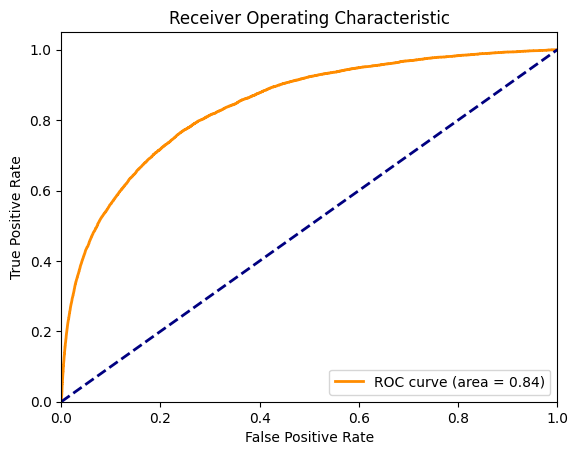

In [86]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


##Handling Class Imbalance

In [87]:
print(credit_loan.shape)

(150000, 14)


In [88]:
freq =  credit_loan['SeriousDlqin2yrs'].value_counts()
print ((freq/freq.sum())*100)

SeriousDlqin2yrs
0    93.316
1     6.684
Name: count, dtype: float64


In [89]:
Not_Serious_Delinquent = credit_loan[credit_loan['SeriousDlqin2yrs']==0]
Serious_Delinquent = credit_loan[credit_loan['SeriousDlqin2yrs']==1]
print("Class_0:",Not_Serious_Delinquent.shape)
print("Class_1:",Serious_Delinquent.shape)

Class_0: (139974, 14)
Class_1: (10026, 14)


In [90]:
#Over sampling for the inferior class
#consider four times of the class
Not_Serious_Delinquent_over = Not_Serious_Delinquent.sample(int(0.5*len(Not_Serious_Delinquent)))
print(Not_Serious_Delinquent_over.shape)

(69987, 14)


In [91]:
# Under sampling for superior class
#I am considering half of the class
Serious_Delinquent_under = Serious_Delinquent.sample(int(4*len(Serious_Delinquent)),replace=True)
print(Serious_Delinquent_under.shape)

(40104, 14)


In [92]:
loan_balanced = pd.concat([Serious_Delinquent_under,Not_Serious_Delinquent_over])
print(loan_balanced.shape)

(110091, 14)


##Model Training after sampling

In [93]:
model_formula2 = ols_formula(loan_balanced.iloc[:,1:],"SeriousDlqin2yrs")
print(model_formula2)
model2 = sm.logit(model_formula2,data=loan_balanced)
result = model2.fit()
y1 = loan_balanced['SeriousDlqin2yrs']
y_pred1 = (result.predict(loan_balanced.iloc[:,2:])>0.2).astype(int)
cm1 = confusion_matrix(y1,y_pred1)
print(cm1)
print(f"Accuracy:{(cm1[0,0]+cm1[1,1])/cm1.sum()}")
print(f"Sensitivity:{cm1[0,0]/(cm1[0,0]+cm1[0,1])}")
print(f"Specificity:{cm1[1,1]/(cm1[1,0]+cm1[1,1])}")

SeriousDlqin2yrs~util_new+age_new+num_30_59_dpd_new+DebtRatio_new_ind+DebtRatio_new+MonthlyIncome_ind+MonthlyIncome_new+Open_Credit_lines_new+num_90_dpd_new+Real_estate_loans_new+num_60_dpd_new+NumberOfDependents_new
Optimization terminated successfully.
         Current function value: 0.473769
         Iterations 7
[[39787 30200]
 [ 4041 36063]]
Accuracy:0.6889754839178498
Sensitivity:0.5684912912398017
Specificity:0.8992369838420108


##Oversampling using SMOTE

In [94]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train = credit_loan.iloc[:,2:]
y_train = credit_loan['SeriousDlqin2yrs']
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
smote  = SMOTE(sampling_strategy = 0.4,random_state=2)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

print("Before smote:",y_train.value_counts())
print("After smote:",y_train_smote.value_counts())

Before smote: SeriousDlqin2yrs
0    111930
1      8070
Name: count, dtype: int64
After smote: SeriousDlqin2yrs
0    111930
1     44772
Name: count, dtype: int64


In [95]:
loan_smote = pd.concat([X_train_smote,y_train_smote],axis=1)
loan_smote.head()

,util_new,age_new,num_30_59_dpd_new,DebtRatio_new_ind,DebtRatio_new,MonthlyIncome_ind,MonthlyIncome_new,Open_Credit_lines_new,num_90_dpd_new,Real_estate_loans_new,num_60_dpd_new,NumberOfDependents_new,SeriousDlqin2yrs
0,0.403080,51,1,1,0.366508,1,4000,8,0,4,0,1,0
1,1.000000,31,0,0,0.102180,1,5000,1,0,0,0,0,1
2,0.225581,32,0,0,0.337527,1,6120,7,0,2,0,0,0
3,0.145291,50,0,0,0.270815,1,5800,11,0,1,0,3,0
4,0.028908,41,0,0,0.768521,1,3900,6,0,2,0,1,0


In [96]:
model_formula3 = ols_formula(loan_smote.iloc[:,:],"SeriousDlqin2yrs")
print(model_formula3)
model3 = sm.logit(model_formula3,data=loan_smote)
result = model3.fit()
y2 = loan_smote['SeriousDlqin2yrs']
y_pred2 = (result.predict(loan_smote.iloc[:,:-1])>0.2).astype(int)
cm2 = confusion_matrix(y2,y_pred2)
print(cm2)
print(f"Accuracy:{(cm2[0,0]+cm2[1,1])/cm2.sum()}")
print(f"Sensitivity:{cm2[0,0]/(cm2[0,0]+cm2[0,1])}")
print(f"Specificity:{cm2[1,1]/(cm2[1,0]+cm2[1,1])}")

SeriousDlqin2yrs~util_new+age_new+num_30_59_dpd_new+DebtRatio_new_ind+DebtRatio_new+MonthlyIncome_ind+MonthlyIncome_new+Open_Credit_lines_new+num_90_dpd_new+Real_estate_loans_new+num_60_dpd_new+NumberOfDependents_new
Optimization terminated successfully.
         Current function value: 0.458396
         Iterations 6
[[72754 39176]
 [ 6526 38246]]
Accuracy:0.7083508825669105
Sensitivity:0.6499955329223622
Specificity:0.854239256678281
